In [58]:
from sim import simulation as sim
import dask
import numpy as np

In [59]:
%time sim.lorenz_96([1,2,3,4], 1)

CPU times: user 22 µs, sys: 5 µs, total: 27 µs
Wall time: 30 µs


array([-4., -2.,  4., -6.])

In [125]:
@dask.delayed
def _add(a, b):
    return a + b

@dask.delayed
def _multiply(a, b):
    return a * b

@dask.delayed
def _square(a):
    return a**2

def _lorenz_96_1d(x: list, i: int, n:int, f:float) -> list:
    
    d = (x[(i+1) % n] - x[i-2]) * x[i-1] - x[i] + f
    
    return d

def lorenz_96_delayed(x, forcing):

    """
    This method implement Lorenz-96 first-order differential equations system.
    :param x: coordinates at time t0
    :param forcing: (constant) forcing term
    :return: state derivatives at time t0
    """
    n = len(x)

    d = []

    for i in range(0, n):
        dx = _lorenz_96_1d(x, i, n, forcing)
        d.append(dx)

    return d

In [182]:
a = []
d = []
x = [i for i in range(1,10)]
n = len(x)
forcing = 1

for t in range(0, 5):
    x1 = []
    for i in range(0,n):
        dx = dask.delayed(_lorenz_96_1d)(x, i, n, forcing)
        x_new = _add(x[i], dx)
        #a = _square(i)
        x1.append(x_new)
    a.append(dask.delayed(sum)(x1))
    x = x1
    
d = dask.delayed(sum)(a)

In [184]:
%time d.compute()

CPU times: user 9.87 ms, sys: 347 µs, total: 10.2 ms
Wall time: 9.13 ms


10697413271779609800629400

In [194]:
a = []
d = []
x = [i for i in range(1,10)]
n = len(x)
forcing = 1

for t in range(0, 5):
    x1 = []
    for i in range(0,n):
        dx = _lorenz_96_1d(x, i, n, forcing)
        x_new = x[i] + dx
        #a = _square(i)
        x1.append(x_new)
    a.append(sum(x1))
    x = x1
    
%time d = sum(a)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


In [193]:
d

10697413271779609800629400

In [108]:
def inc(x):
    return x + 1

def double(x):
    return x + 2

def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = dask.delayed(inc)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(add)(a, b)
    output.append(c)

total = dask.delayed(sum)(output)

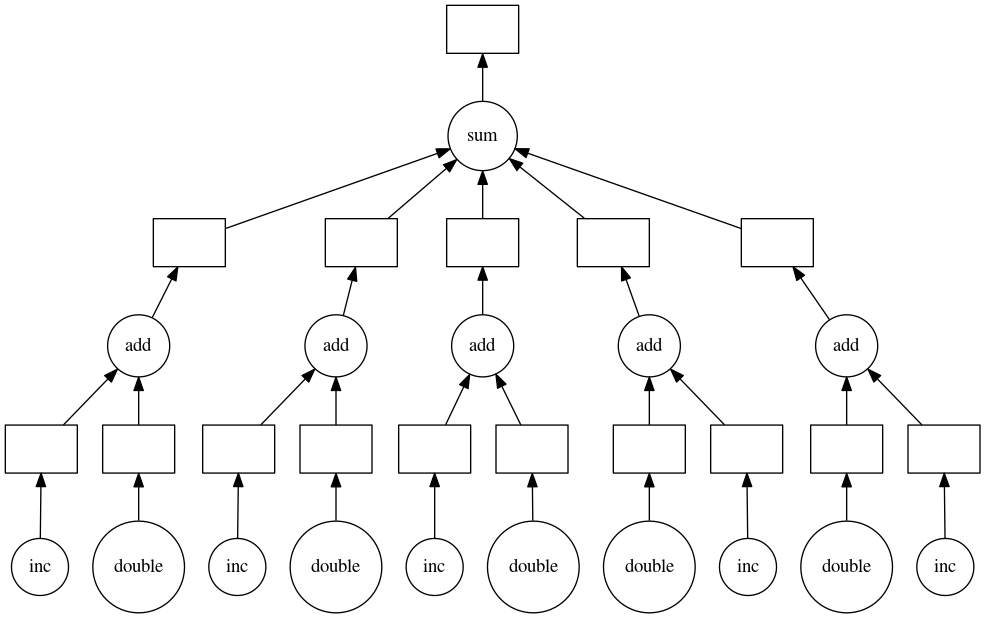

In [109]:
total.visualize()

In [152]:
def inc(x):
    return x + 1

def double(x):
    return x + 2

def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

%time total = sum(output)

CPU times: user 14 µs, sys: 3 µs, total: 17 µs
Wall time: 20 µs


In [153]:
output = []
for x in data:
    a = dask.delayed(inc)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(add)(a, b)
    output.append(c)

total = dask.delayed(sum)(output)

%time total.compute()

CPU times: user 1.29 ms, sys: 0 ns, total: 1.29 ms
Wall time: 1.19 ms


45